<a href="https://colab.research.google.com/github/AbdalrahmanAliElnashar/NLP/blob/main/NLP_Reuters_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import keras and reuters dataset

In [ ]:
import keras
from keras.datasets import reuters

## Access dataset

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")

print('# of Training Samples: {}'.format(len(train_data)))
print('# of Test Samples: {}'.format(len(test_data)))

num_classes = max(train_labels) + 1
print('# of Classes: {}'.format(num_classes))

# of Training Samples: 8982
# of Test Samples: 2246
# of Classes: 46


In [ ]:
train_labels[100]

20

## Prepare data

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# reverse_word_index
# decoded_newswire

In [ ]:
train_labels[10]

3

## Vectorization data

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

x_train,x_train.shape,x_train.ndim

(array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]), (8982, 10000), 2)

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# # Our vectorized training data
# x_train = vectorize_sequences(train_data)
# # Our vectorized test data
# x_test = vectorize_sequences(test_data)
# x_train[0],x_train.shape,x_train.ndim
data=[1,2,4,9,0]
x= vectorize_sequences(data)
x,x.shape,x.ndim

(array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), (5, 10), 2)

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)
one_hot_train_labels,one_hot_train_labels.shape,one_hot_train_labels.ndim

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), (8982, 46), 2)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building Neural Networks

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# train network with 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 58ms/step - loss: 2.5479 - accuracy: 0.5059 - val_loss: 1.7058 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.4243 - accuracy: 0.7042 - val_loss: 1.3364 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0754 - accuracy: 0.7705 - val_loss: 1.1645 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8442 - accuracy: 0.8181 - val_loss: 1.0347 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6703 - accuracy: 0.8591 - val_loss: 0.9737 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5344 - accuracy: 0.8914 - val_loss: 0.9436 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4261 - accuracy: 0.9141 - val_loss: 0.8932 - val_accuracy: 0.8120
Epoch 8/20
16

## Loss Function and accuarcy Curves




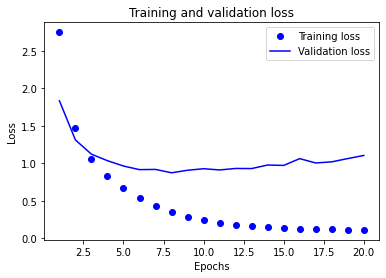

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

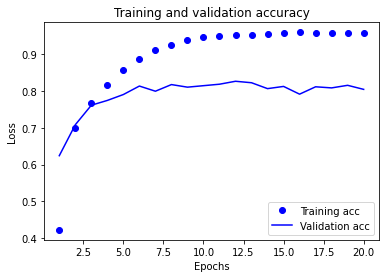

In [ ]:
plt.clf()  

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### loss function of validation dataset starts overfitting after 8 epochs so we will reduce the number of epochs

## Build neural network with 8 epochs

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# train network with 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/8
16/16 [==============================] - 1s 58ms/step - loss: 2.6120 - accuracy: 0.5169 - val_loss: 1.7390 - val_accuracy: 0.6200
Epoch 2/8
16/16 [==============================] - 1s 47ms/step - loss: 1.4222 - accuracy: 0.6927 - val_loss: 1.3030 - val_accuracy: 0.6970
Epoch 3/8
16/16 [==============================] - 1s 47ms/step - loss: 1.0568 - accuracy: 0.7736 - val_loss: 1.1255 - val_accuracy: 0.7490
Epoch 4/8
16/16 [==============================] - 1s 48ms/step - loss: 0.8300 - accuracy: 0.8215 - val_loss: 1.0262 - val_accuracy: 0.7800
Epoch 5/8
16/16 [==============================] - 1s 48ms/step - loss: 0.6659 - accuracy: 0.8572 - val_loss: 0.9935 - val_accuracy: 0.7680
Epoch 6/8
16/16 [==============================] - 1s 47ms/step - loss: 0.5323 - accuracy: 0.8880 - val_loss: 0.9307 - val_accuracy: 0.8060
Epoch 7/8
16/16 [==============================] - 1s 46ms/step - loss: 0.4274 - accuracy: 0.9142 - val_loss: 0.9029 - val_accuracy: 0.8130
Epoch 8/8
16/16 [===

##Loss Function and accuarcy Curves

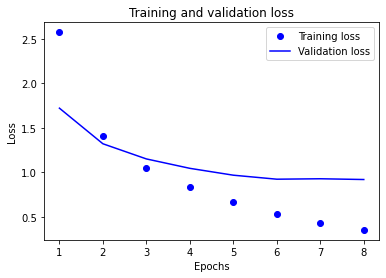

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

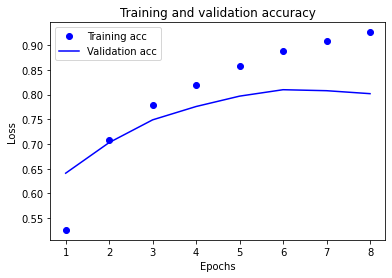

In [ ]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()